In [2]:

import numpy as np 
import pandas as pd 


In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('data/harddrive.csv')
print(df.shape)
df.head()

(3179295, 95)


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2016-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,135.0,108.0,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,Z305B2QN,ST4000DM000,1.976651e-311,0,113,54551400,NaN,NaN,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,1.482490e-311,0,200,0,NaN,NaN,175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.loc[:, ~df.isnull().all()]
print(df.shape)

(3179295, 91)


In [6]:
print("no of hdd:", df['serial_number'].value_counts().shape) 

print("no of different hdd", df['model'].value_counts().shape)

no of hdd: (65993,)
no of different hdd (69,)


In [7]:
failed_hdds = df.loc[df.failure==1]["serial_number"]
len(failed_hdds)

215

In [8]:
df = df.loc[df["serial_number"].isin(failed_hdds)]
df.shape

(5490, 91)

In [9]:
df["end_date"] = df.groupby("serial_number")["date"].transform("max")

In [10]:
df["end_date"] = pd.to_datetime(df["end_date"])
df["date"] = pd.to_datetime(df["date"])

In [11]:
df["date_diff"] = df["end_date"] - df["date"]
df["date_diff"].describe()

count                          5490
mean     49 days 09:18:25.573770492
std      44 days 09:17:21.395230515
min                 0 days 00:00:00
25%                 7 days 00:00:00
50%                21 days 00:00:00
75%                95 days 00:00:00
max               119 days 00:00:00
Name: date_diff, dtype: object

In [12]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,end_date,date_diff
376,2016-01-01,Z300ZST1,ST4000DM000,1.976651e-311,0,120,240872800,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-17,16 days
1657,2016-01-01,9VY8TCAV,ST3160318AS,7.907120e-313,0,111,38605541,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-09,99 days
1895,2016-01-01,W300BG0H,ST4000DM000,1.976651e-311,0,118,190147064,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-18,108 days
2900,2016-01-01,W300J6FX,ST4000DM000,1.976651e-311,0,115,85258376,NaN,NaN,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-09,99 days
3204,2016-01-01,Z3014A4S,ST4000DM000,1.976651e-311,0,116,101976792,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-10,9 days


In [13]:
df.isnull().sum()

date                       0
serial_number              0
model                      0
capacity_bytes             0
failure                    0
                        ... 
smart_252_raw           4973
smart_254_normalized    4921
smart_254_raw           4921
end_date                   0
date_diff                  0
Length: 93, dtype: int64

In [14]:
df[df["serial_number"]=='Z300ZST1'].shape

(18, 93)

In [15]:
df_notna = df[df.columns[~(df.isna().sum().values/len(df) > 0.05)]]

In [16]:
df_notna.dropna(inplace=True)

C:\Users\Varun Jhaveri\AppData\Local\Temp\ipykernel_19616\748473798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notna.dropna(inplace=True)


In [17]:
df = df_notna.copy()

In [18]:
df.reset_index(inplace=True, drop=True)

In [19]:
df.isnull().sum()

date                    0
serial_number           0
model                   0
capacity_bytes          0
failure                 0
smart_1_normalized      0
smart_1_raw             0
smart_3_normalized      0
smart_3_raw             0
smart_4_normalized      0
smart_4_raw             0
smart_5_normalized      0
smart_5_raw             0
smart_7_normalized      0
smart_7_raw             0
smart_9_normalized      0
smart_9_raw             0
smart_10_normalized     0
smart_10_raw            0
smart_12_normalized     0
smart_12_raw            0
smart_188_raw           0
smart_192_normalized    0
smart_192_raw           0
smart_193_normalized    0
smart_193_raw           0
smart_194_normalized    0
smart_194_raw           0
smart_197_normalized    0
smart_197_raw           0
smart_198_normalized    0
smart_198_raw           0
smart_199_normalized    0
smart_199_raw           0
smart_240_raw           0
smart_241_raw           0
smart_242_raw           0
end_date                0
date_diff   

In [20]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,end_date,date_diff
0,2016-01-01,Z300ZST1,ST4000DM000,1.976651e-311,0,120,240872800,91,0,100,...,0,100,0,200,0,8.206430e-320,1.146406e-313,9.784107e-313,2016-01-17,16 days
1,2016-01-01,W300BG0H,ST4000DM000,1.976651e-311,0,118,190147064,91,0,100,...,0,100,0,200,0,7.857538e-310,1.249659e-313,6.394443e-313,2016-04-18,108 days
2,2016-01-01,W300J6FX,ST4000DM000,1.976651e-311,0,115,85258376,92,0,100,...,0,100,0,200,0,1.000186e-319,1.324438e-313,6.040397e-313,2016-04-09,99 days
3,2016-01-01,Z3014A4S,ST4000DM000,1.976651e-311,0,116,101976792,91,0,100,...,8,100,8,200,0,8.351192e-320,1.063035e-313,1.019657e-312,2016-01-10,9 days
4,2016-01-01,Z4D045CF,ST6000DX000,2.964974e-311,0,116,101694695,88,0,100,...,0,100,0,200,0,9.331476e-310,1.260229e-313,1.176377e-310,2016-04-05,95 days


In [21]:
df = df.drop(['date', 'serial_number', 'model','end_date'], axis=1)
df.head()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,date_diff
0,1.976651e-311,0,120,240872800,91,0,100,10,100,0,...,100,0,100,0,200,0,8.206430e-320,1.146406e-313,9.784107e-313,16 days
1,1.976651e-311,0,118,190147064,91,0,100,10,100,0,...,100,0,100,0,200,0,7.857538e-310,1.249659e-313,6.394443e-313,108 days
2,1.976651e-311,0,115,85258376,92,0,100,8,100,0,...,100,0,100,0,200,0,1.000186e-319,1.324438e-313,6.040397e-313,99 days
3,1.976651e-311,0,116,101976792,91,0,100,9,100,0,...,100,8,100,8,200,0,8.351192e-320,1.063035e-313,1.019657e-312,9 days
4,2.964974e-311,0,116,101694695,88,0,100,17,100,0,...,100,0,100,0,200,0,9.331476e-310,1.260229e-313,1.176377e-310,95 days


In [22]:
Y = df["date_diff"].dt.days
X = df.drop(["date_diff"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor

RF_model=RandomForestRegressor(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)
import joblib 
model_filename = 'rff.joblib'
joblib.dump(RF_model, model_filename)

['rff.joblib']

In [24]:
y_pred = RF_model.predict(X_test)
RF_model.score(X_test, y_test)

0.9778294265198173

EDA

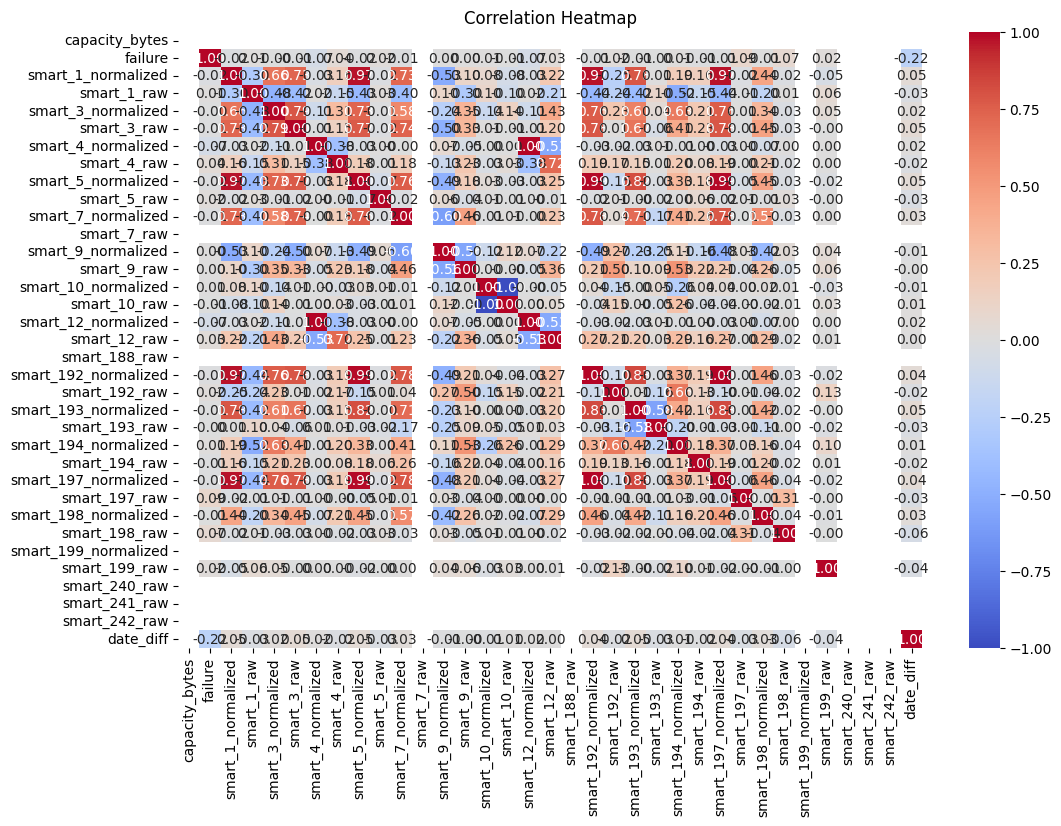

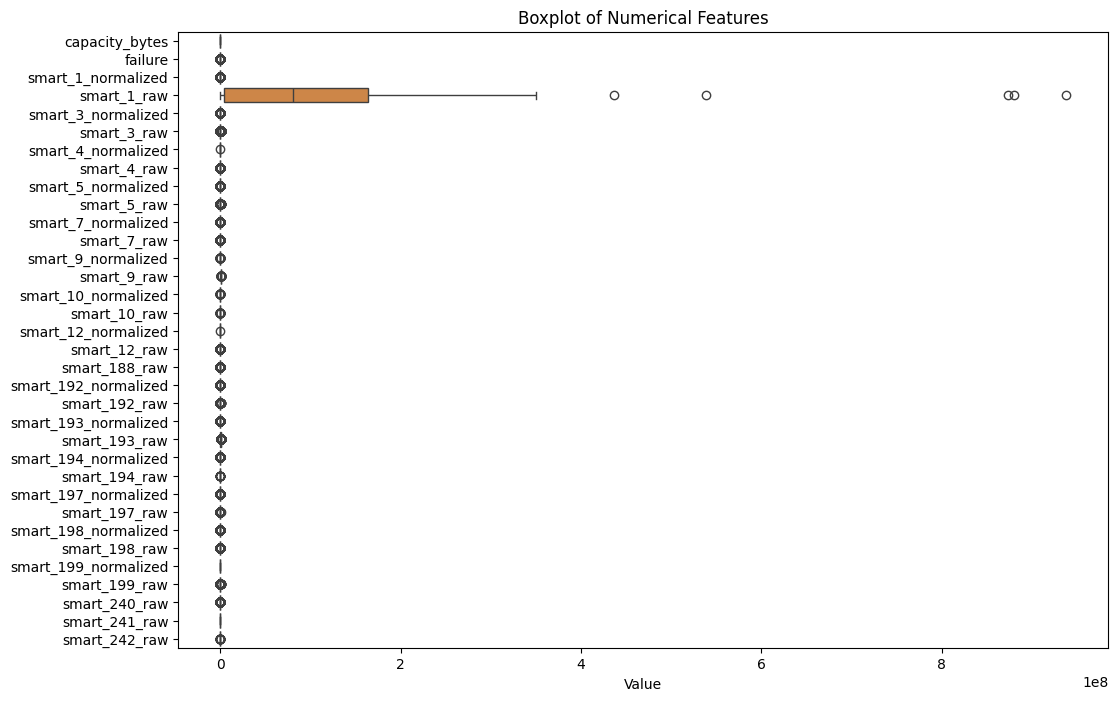

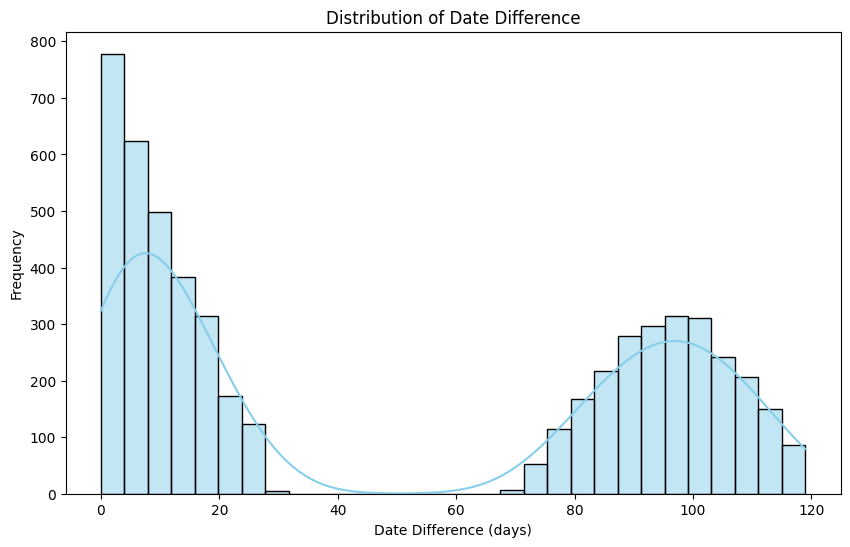

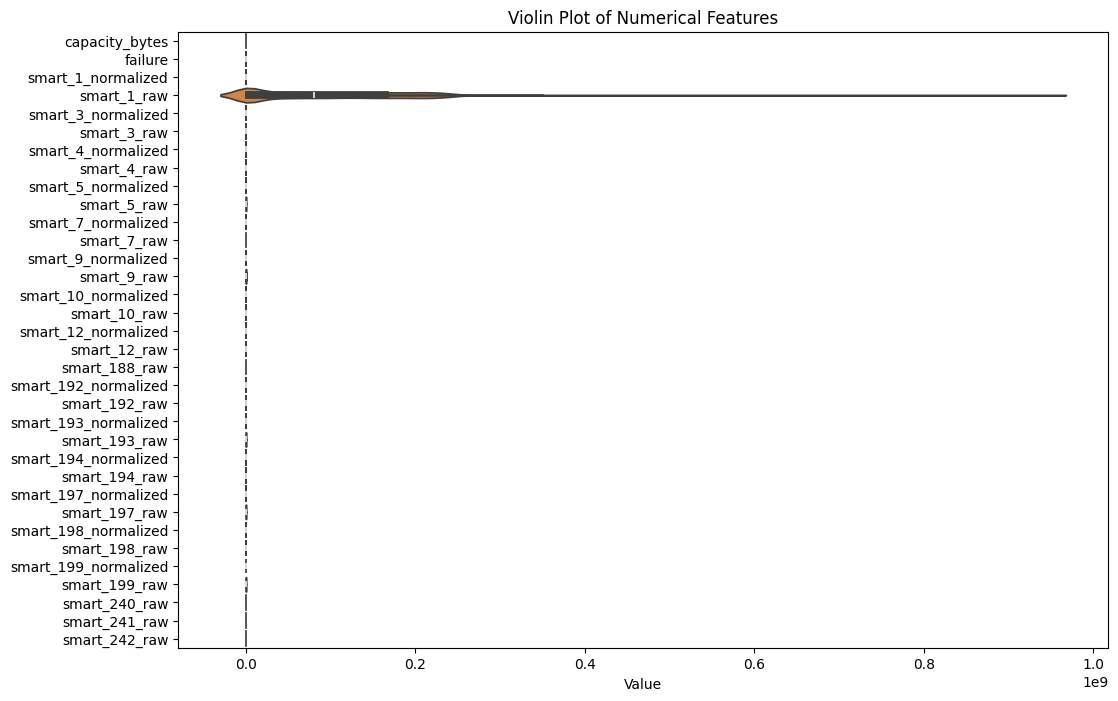

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Numerical Features')
plt.xlabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df["date_diff"].dt.days, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Date Difference')
plt.xlabel('Date Difference (days)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(data=X, orient='h')
plt.title('Violin Plot of Numerical Features')
plt.xlabel('Value')
plt.show()
